In [1]:
# dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import pandas as pd
from pathlib import Path


In [2]:
# import drug_death_clean.csv 
drug1DF = pd.read_csv(("../Data Cleaning/drug_deaths_clean.csv"))
pd.set_option('display.max_columns', None)
drugDF = drug1DF[['ID', 'Date', 'DateType', 'Age', 'Sex', 'Race',
       'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity',
       'InjuryState', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'Other', 'OpiateNOS', 'AnyOpioid', 'DeathCityGeo']]
drugDF.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,InjuryState,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo
0,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"Danbury, CT\n(41.393666, -73.451539)"
1,15-0232,05/14/2015 12:00:00 AM,1.0,50.0,Male,White,DANBURY,FAIRFIELD,CT,DANBURY,NaN,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"DANBURY, CT\n(41.393666, -73.451539)"
2,16-0028,01/13/2016 12:00:00 AM,0.0,29.0,Male,Black,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,NaN,1,0,0,0.0,0,0,0,0,1,0,1,0,0,0,NaN,0,1,"NEW HAVEN, CT\n(41.308252, -72.924161)"
3,16-0065,01/30/2016 12:00:00 AM,0.0,54.0,Male,White,MIDDLETOWN,MIDDLESEX,CT,MIDDLETOWN,NaN,1,0,0,0.0,0,0,1,0,0,0,0,0,0,0,NaN,0,1,"MIDDLETOWN, CT\n(41.544654, -72.651713)"
4,16-0889,12/20/2016 12:00:00 AM,0.0,32.0,Male,White,WINDHAM,WINDHAM,CT,WINDHAM,NaN,1,0,1,0.0,0,0,0,0,1,0,0,0,0,0,NaN,0,1,"Windham, CT\n(41.699744, -72.157703)"


In [3]:
# break dates down into lists
dates = []
year = []
month = []
day = []

for x in range(len(drugDF.index)):
    dates.append(drugDF['Date'][x].split()[0])
    year.append(drugDF['Date'][x].split()[0].split('/')[2])
    month.append(drugDF['Date'][x].split()[0].split('/')[0])
    day.append(drugDF['Date'][x].split()[0].split('/')[1])
    #print(f'{month[x]} {day[x]} {year[x]} | {dates[x]}')

In [4]:
# create a data frame for new date variables
dateDF = pd.DataFrame({'Date':dates,
                       'Month':month,
                       'Day':day,
                       'Year':year,
                       'Season':''})
dateDF

,Date,Month,Day,Year,Season
0,03/13/2016,03,13,2016,
1,05/14/2015,05,14,2015,
2,01/13/2016,01,13,2016,
3,01/30/2016,01,30,2016,
4,12/20/2016,12,20,2016,
...,...,...,...,...,...
3420,12/02/2017,12,02,2017,
3421,01/07/2015,01,07,2015,
3422,09/08/2015,09,08,2015,
3423,07/22/2017,07,22,2017,


In [5]:
# assign seasons to date dataframe
for x in range(len(dateDF.index)):
    if dateDF['Month'][x] == '03' or dateDF['Month'][x] == '04' or dateDF['Month'][x] == '05':
        dateDF['Season'][x] = 'Spring'
    elif dateDF['Month'][x] == '06' or dateDF['Month'][x] == '07' or dateDF['Month'][x] == '08':
        dateDF['Season'][x] = 'Summer'
    elif dateDF['Month'][x] == '09' or dateDF['Month'][x] == '10' or dateDF['Month'][x] == '11':
        dateDF['Season'][x] = 'Autumn'
    elif dateDF['Month'][x] == '12' or dateDF['Month'][x] == '01' or dateDF['Month'][x] == '02':
        dateDF['Season'][x] = 'Winter'
    else:
        dateDF['Season'][x] = 'N/A'
dateDF

,Date,Month,Day,Year,Season
0,03/13/2016,03,13,2016,Spring
1,05/14/2015,05,14,2015,Spring
2,01/13/2016,01,13,2016,Winter
3,01/30/2016,01,30,2016,Winter
4,12/20/2016,12,20,2016,Winter
...,...,...,...,...,...
3420,12/02/2017,12,02,2017,Winter
3421,01/07/2015,01,07,2015,Winter
3422,09/08/2015,09,08,2015,Autumn
3423,07/22/2017,07,22,2017,Summer


In [6]:
# create dataframe for each season
SpringDF = dateDF.loc[dateDF['Season'] == 'Spring']
SummerDF = dateDF.loc[dateDF['Season'] == 'Summer']
AutumnDF = dateDF.loc[dateDF['Season'] == 'Autumn']
WinterDF = dateDF.loc[dateDF['Season'] == 'Winter']

In [7]:
SpringDF['Year'] = pd.to_numeric(SpringDF['Year'])
SummerDF['Year'] = pd.to_numeric(SummerDF['Year'])
AutumnDF['Year'] = pd.to_numeric(AutumnDF['Year'])
WinterDF['Year'] = pd.to_numeric(WinterDF['Year'])
SpringDF.sort_values(by=['Year'])
SummerDF.sort_values(by=['Year'])
AutumnDF.sort_values(by=['Year'])
WinterDF.sort_values(by=['Year'])

C:\Users\AzureDemise\AppData\Local\Temp\ipykernel_33832\663677240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SpringDF['Year'] = pd.to_numeric(SpringDF['Year'])
C:\Users\AzureDemise\AppData\Local\Temp\ipykernel_33832\663677240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SummerDF['Year'] = pd.to_numeric(SummerDF['Year'])
C:\Users\AzureDemise\AppData\Local\Temp\ipykernel_33832\663677240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,Date,Month,Day,Year,Season
3421,01/07/2015,01,07,2015,Winter
2306,01/08/2015,01,08,2015,Winter
649,01/06/2015,01,06,2015,Winter
651,02/05/2015,02,05,2015,Winter
2286,02/06/2015,02,06,2015,Winter
...,...,...,...,...,...
2237,02/01/2018,02,01,2018,Winter
2232,02/18/2018,02,18,2018,Winter
2223,12/24/2018,12,24,2018,Winter
2213,02/13/2018,02,13,2018,Winter


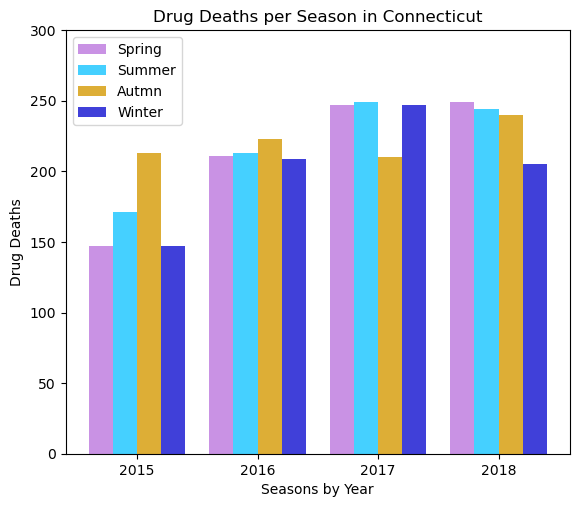

In [8]:
#assign color values
purple = clr.to_rgba('darkorchid', alpha=0.53)
lBlue = clr.to_rgba('deepskyblue', alpha=0.73)
dBlue = clr.to_rgba('mediumblue', alpha=0.75)
gold = clr.to_rgba('goldenrod', alpha=0.9)
colors = [purple, lBlue, gold, dBlue]
x = np.arange(2014.5,2019,1)

#plot and label histogram
plt.figure(figsize=(6.5,5.5))
plt.hist([SpringDF['Year'], SummerDF['Year'], AutumnDF['Year'], WinterDF['Year']],
         label=['Spring', 'Summer', 'Autmn', 'Winter'], color = colors,bins = x)

plt.xticks([2015, 2016, 2017, 2018])
plt.ylim(-0, 300)
plt.title("Drug Deaths per Season in Connecticut")
plt.xlabel("Seasons by Year")
plt.ylabel("Drug Deaths")
plt.legend(loc="upper left")
plt.savefig("Images/SeasonsHistogram.png")